# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Importing Data

In [2]:
df = pd.read_csv("wine.csv")

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# Data Preprocessing

## Duplicated Data

In [5]:
df.duplicated().sum()

0

## Splitting Data

In [6]:
X = df.iloc[:,:-1].values

In [7]:
y =df.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Standarization Data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
model = StandardScaler()

In [12]:
X_train = model.fit_transform(X_train)
X_test = model.transform(X_test)

## Dimensionality Reduction

## Scree Plot

In [13]:
from sklearn.decomposition import PCA

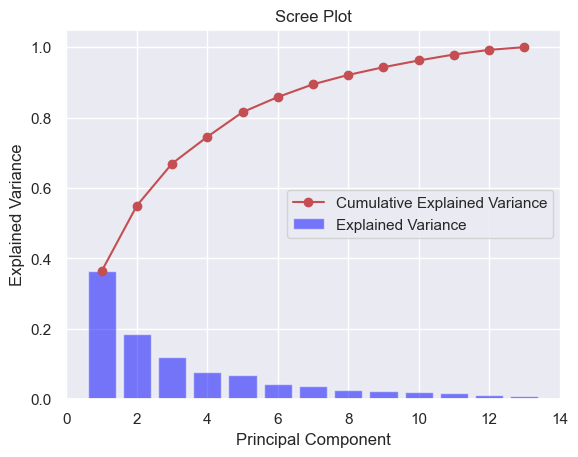

<Figure size 1000x800 with 0 Axes>

In [14]:
pca = PCA()
pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_

fig, ax = plt.subplots()

ax.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='blue', alpha=0.5, label='Explained Variance')

cumulative_variance = np.cumsum(explained_variance_ratio)
ax.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,'ro-' ,label='Cumulative Explained Variance')

plt.figure(figsize=(10,8))
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
ax.set_title('Scree Plot')

ax.legend()
plt.show()

In [15]:
pca = PCA(n_components=2)

In [16]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [17]:
X_train.shape

(119, 2)

In [18]:
X_test.shape

(59, 2)

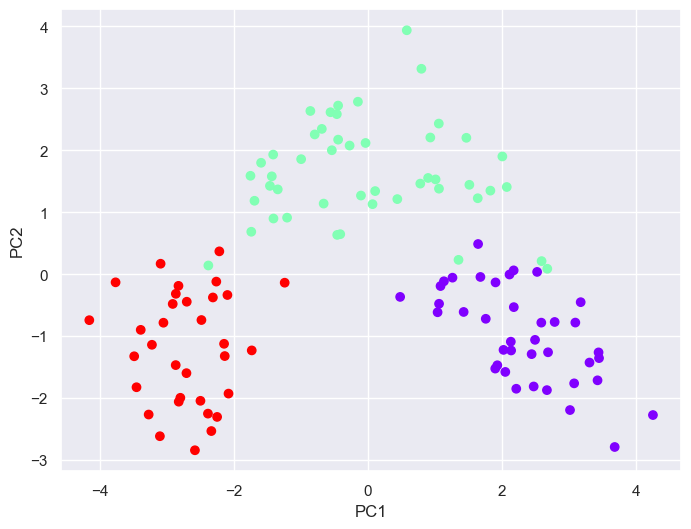

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [20]:
pca.components_

array([[ 0.14733424, -0.25027499, -0.01252058, -0.23440896,  0.15738948,
         0.39369045,  0.41565632, -0.27414911,  0.33265958, -0.10517746,
         0.29234204,  0.38195327,  0.28245765],
       [-0.48989241, -0.23489249, -0.24612128,  0.09586839, -0.27341935,
        -0.05255799,  0.00246418, -0.02048056, -0.01293734, -0.55210635,
         0.28639953,  0.15726874, -0.38127621]])

In [21]:
pca.explained_variance_ratio_

array([0.36351132, 0.18633855])

# Building & Testing Model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
classifier = LogisticRegression(random_state = 0)

In [24]:
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

# Prediction

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
y_pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 2, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 2, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2], dtype=int64)

In [27]:
y_test

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2], dtype=int64)

# Evaluation

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

0.9661016949152542

# Thank You 🥰